# Data Wrangling and Analysis Project: WeRateDogs

## Table of Content
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#gather">Gather</a></li>
<li><a href="#assess">Assess</a></li>
<li><a href="#summary">Summary of Assessment</a></li>
<li><a href="#clean">Clean</a></li>
<li><a href="#analysis">Analysis and Data Visualization</a></li>
</ul>

<a id='intro'></a>

## Introduction
> This is a data-wrangling project. The main object of this project is to pratice the functions and data-wrangling skills which are learned in class with real-world data. The data source stems from the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. This twitter account rates people's dogs with a humorous comment about the dog. 

<a id='gather'></a>

## Gather

Retrieve all necessary data from different sources for analysis

In [1]:
# Import all necessary libraries
import pandas as pd
import numpy as np
import requests
import tweepy 
import json
from tweepy import OAuthHandler
from timeit import default_timer as timer
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Download data from CSV file.
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

# Check if the data is loaded successfully
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
# Downlod data from internet and save the content as TSV file
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open ('image_predictions.tsv', mode='wb') as file:
    file.write(response.content)

In [4]:
# Retrieve the data
image_predictions = pd.read_csv('image_predictions.tsv', sep = '\t')

# Check if the data is loaded successfully
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [11]:
# Query Twitter API for each tweet in the Twitter archive.
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [12]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
tweet_ids = twitter_archive.tweet_id

# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in twitter_archive['tweet_id']:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

In [5]:
# Retrieve data from JSON file and save the information as a dataframe

tweet_list =[]

with open('tweet_json.txt') as json_file:
    for line in json_file:
        tweets_json = json.loads(line)
        tweet_id = tweets_json['id']
        fav_count = tweets_json['favorite_count']
        ret_count = tweets_json['retweet_count']
        tweet_list.append({'tweet_id': str(tweet_id),
                           'favorite_count': int(fav_count),
                           'retweet_count': int(ret_count)})
        
tweet_df = pd.DataFrame(tweet_list, columns = ['tweet_id', 'favorite_count', 'retweet_count'])

# Check if the data is loaded successfully
tweet_df.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,37554,8191
1,892177421306343426,32278,6059
2,891815181378084864,24321,4008
3,891689557279858688,40907,8347
4,891327558926688256,39100,9041


<a id='assess'></a>

## Assess

Assess data visually and programatically to identify quality and tidiness issues.

In [6]:
# Visual assessment of twitter archive
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


### Observations
- The source still has html tags. (tidiness)
- The dataset contains retweets. (quality)
- The dog names have some odd strings like 'the', 'a', 'an'. (quality)
- The columns name, doggo, floofer, pupper, puppo have 'None' values. (quality)

In [7]:
# Visual assessment of image predictions
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


### Observation
- Some data is missing in this dataset.(quality)

In [8]:
# Visual assessment of tweet_df
tweet_df

,tweet_id,favorite_count,retweet_count
0,892420643555336193,37554,8191
1,892177421306343426,32278,6059
2,891815181378084864,24321,4008
3,891689557279858688,40907,8347
4,891327558926688256,39100,9041
5,891087950875897856,19662,3002
6,890971913173991426,11492,1985
7,890729181411237888,63360,18201
8,890609185150312448,27030,4120
9,890240255349198849,30970,7113


### Observation
- Some data is missing in this dataset. (quality)

In [9]:
# Programatic assessment of twitter_archive
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [10]:
twitter_archive.duplicated().sum()

0

In [11]:
twitter_archive.tweet_id.nunique()

2356

In [12]:
twitter_archive[twitter_archive.retweeted_status_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Terrance. He's being yelle...,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397...,11,10,Terrance,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,14,10,None,None,None,pupper,None
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Coco. At first I though...,8.663350e+17,4.196984e+09,2017-05-21 16:48:45 +0000,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,None,None,None,None
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,None,None,None,None
97,873337748698140672,NaN,NaN,2017-06-10 00:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sierra. She's one preci...,8.732138e+17,4.196984e+09,2017-06-09 16:22:42 +0000,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None


In [13]:
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [14]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [15]:
twitter_archive.name.value_counts()

None              745
a                  55
Charlie            12
Lucy               11
Cooper             11
Oliver             11
Penny              10
Lola               10
Tucker             10
Winston             9
Bo                  9
Sadie               8
the                 8
Toby                7
Bailey              7
Daisy               7
an                  7
Buddy               7
Leo                 6
Dave                6
Rusty               6
Jack                6
Scout               6
Jax                 6
Stanley             6
Milo                6
Koda                6
Oscar               6
Bella               6
Phil                5
                 ... 
Trevith             1
Severus             1
Crumpet             1
Cheryl              1
Trip                1
Brooks              1
Antony              1
Beemo               1
Carter              1
Michelangelope      1
Winifred            1
Mason               1
Gilbert             1
Sobe                1
Genevieve 

### Observation
- tweet_id, in_reply_to_status_id, and in_reply_to_user_id should be string. (quality)
- timestamp should be datetime. (quality)
- retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp are not relevant information. (quality)
- Last four columns should contain null values. (qualuty)
- Several denominators are not equal to 10. (quality)
- One column for Dog Stage is enough. (tidiness)

In [16]:
# Programatic assessment of image_predictions
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [17]:
image_predictions.duplicated().sum()

0

### Observation
- tweet_id shold be string. (quality)

In [18]:
# Programatic assessment of tweet_df
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2337 entries, 0 to 2336
Data columns (total 3 columns):
tweet_id          2337 non-null object
favorite_count    2337 non-null int64
retweet_count     2337 non-null int64
dtypes: int64(2), object(1)
memory usage: 54.9+ KB


In [19]:
tweet_df.duplicated().sum()

0

In [20]:
# Check duplicate columns for three datasets.
all_columns = pd.Series(list(twitter_archive)+list(image_predictions)+list(tweet_df))
all_columns[all_columns.duplicated()]

17    tweet_id
29    tweet_id
dtype: object

### Observation
- We can merge tweet_df with twitter_archive. (tidiness)

<a id='summary'></a>

## Summery of Assessment

### Quality: content-related issues
#### twitter_archive
- The dataset contains retweets.
- retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp are not relevant information.
- The dog names have some odd strings like 'the', 'a', 'an'.
- Columns name, doggo, floofer, pupper, puppo have 'None' values.
- tweet_id, in_reply_to_status_id and in_reply_to_user_idshould be string.
- favorite_count, retweet_count should be integer.
- timestamp, retweeted_status_timestamp should be datetime.
- Several denominators are not equal to 10.
- The source still has html tags.

#### image_predictions
- Some data missing (not be addressed).

#### tweet_df
- Some data missing (not be addressed).


### Tidiness: structure-related issues
#### twitter_archive 
- One column for Dog Stage is enough.

#### tweet_df
- We can merge with twitter_archive.

<a id='clean'></a>

## Clean

In [21]:
### Copy three datasets
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
tweet_df_clean = tweet_df.copy()

### Define

Melt the columns 'doggo','floofer','pupper','puppo' into a column 'dog stage'

### Code

In [22]:
def dog_stage(df):
    stage = []
    if df['doggo'] == 'doggo':
        stage.append('Doggo')
    elif df['floofer'] == 'floofer':
        stage.append('Floofer')
    elif df['pupper'] == 'pupper':
        stage.append('Pupper')
    elif df['puppo'] == 'puppo':
        stage.append('Puppo')
    else:
        stage.append('None')
    df['dog_stage'] = ','.join(stage)
    return df

twitter_archive_clean = twitter_archive_clean.apply(dog_stage, axis = 1)

# Drop four-stage columns
twitter_archive_clean = twitter_archive_clean.drop(['doggo','floofer','pupper','puppo'], axis=1)

### Test

In [23]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
dog_stage                     2356 non-null object
dtypes: float64(4), int64(3), object(7)
memory usage: 257.8+ KB


### Define

The retweets rows have to be dropped.

### Code

In [24]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['retweeted_status_id'].isnull()]

### Test

In [25]:
twitter_archive_clean['retweeted_status_id'].notnull().sum()

0

### Define

Remove html tags in the source.

### Code

In [26]:
import re

def remove_html_tags(df):
    clean = re.compile('<.*?>')
    return re.sub(clean, '', df['source'])
        
twitter_archive_clean['source'] = twitter_archive_clean.apply(remove_html_tags, axis=1)
twitter_archive_clean['source'] = twitter_archive_clean['source'].astype('category')

### Test

In [27]:
twitter_archive_clean['source'].value_counts()

Twitter for iPhone     2042
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

### Define

Replace dog names 'a', 'an', and 'the' with "None".

### Code

In [28]:
def remove_ineffective_name(df):
    word_list = ['a','an','the']
    if df['name'] in word_list:
        new_name = df['name'].replace(df['name'], "None")
        return new_name
    else:
        return df['name']
    
twitter_archive_clean['name'] = twitter_archive_clean.apply(remove_ineffective_name, axis=1)

### Test

In [29]:
twitter_archive_clean[twitter_archive_clean['name'] == 'an'].count()

tweet_id                      0
in_reply_to_status_id         0
in_reply_to_user_id           0
timestamp                     0
source                        0
text                          0
retweeted_status_id           0
retweeted_status_user_id      0
retweeted_status_timestamp    0
expanded_urls                 0
rating_numerator              0
rating_denominator            0
name                          0
dog_stage                     0
dtype: int64

In [30]:
twitter_archive_clean[twitter_archive_clean['name'] == 'None'].count()

tweet_id                      749
in_reply_to_status_id          77
in_reply_to_user_id            77
timestamp                     749
source                        749
text                          749
retweeted_status_id             0
retweeted_status_user_id        0
retweeted_status_timestamp      0
expanded_urls                 691
rating_numerator              749
rating_denominator            749
name                          749
dog_stage                     749
dtype: int64

### Define

Assign np.nan to None in columns name and dog_stage.

### Code

In [31]:
twitter_archive_clean[['name','dog_stage']] = twitter_archive_clean[['name','dog_stage']].replace('None',np.nan)

### Test

In [32]:
twitter_archive_clean[['name','dog_stage']].isnull().sum()

name          749
dog_stage    1831
dtype: int64

### Define

Drop retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp.

### Code

In [33]:
twitter_archive_clean = twitter_archive_clean.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'], axis=1)

### Test

In [34]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null category
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     1426 non-null object
dog_stage                344 non-null object
dtypes: category(1), float64(2), int64(3), object(5)
memory usage: 189.2+ KB


### Define

- Convert tweet_id, in_reply_to_status_id, and in_reply_to_user_id from numbers to string
- Convert favorite_count and retweet_count from float to int

### Code

In [35]:
twitter_archive_clean['tweet_id'] = twitter_archive_clean['tweet_id'].astype(str)
twitter_archive_clean['in_reply_to_status_id'] = twitter_archive_clean['in_reply_to_status_id'].astype(str)
twitter_archive_clean['in_reply_to_user_id'] = twitter_archive_clean['in_reply_to_user_id'].astype(str)
tweet_df_clean['favorite_count'] = tweet_df_clean['favorite_count'].astype(int)
tweet_df_clean['retweet_count'] = tweet_df_clean['retweet_count'].astype(int)

### Test

In [36]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id                 2175 non-null object
in_reply_to_status_id    2175 non-null object
in_reply_to_user_id      2175 non-null object
timestamp                2175 non-null object
source                   2175 non-null category
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     1426 non-null object
dog_stage                344 non-null object
dtypes: category(1), int64(2), object(8)
memory usage: 189.2+ KB


In [37]:
tweet_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2337 entries, 0 to 2336
Data columns (total 3 columns):
tweet_id          2337 non-null object
favorite_count    2337 non-null int64
retweet_count     2337 non-null int64
dtypes: int64(2), object(1)
memory usage: 54.9+ KB


### Define

Convert timestamp to datetime

### Code

In [38]:
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])

### Test

In [39]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id                 2175 non-null object
in_reply_to_status_id    2175 non-null object
in_reply_to_user_id      2175 non-null object
timestamp                2175 non-null datetime64[ns]
source                   2175 non-null category
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     1426 non-null object
dog_stage                344 non-null object
dtypes: category(1), datetime64[ns](1), int64(2), object(7)
memory usage: 189.2+ KB


### Define

Drop those rows of which the denominators are not 10.

### Code

In [40]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['rating_denominator'] == 10]

### Test

In [41]:
twitter_archive_clean['rating_denominator'].value_counts()

10    2153
Name: rating_denominator, dtype: int64

### Define

Merge tweet_df with twitter_archive_clean

### Code

In [42]:
twitter_archive_clean_final = pd.merge(twitter_archive_clean, tweet_df_clean, how='inner', on=['tweet_id'])

### Test

In [43]:
twitter_archive_clean_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2149 entries, 0 to 2148
Data columns (total 13 columns):
tweet_id                 2149 non-null object
in_reply_to_status_id    2149 non-null object
in_reply_to_user_id      2149 non-null object
timestamp                2149 non-null datetime64[ns]
source                   2149 non-null category
text                     2149 non-null object
expanded_urls            2095 non-null object
rating_numerator         2149 non-null int64
rating_denominator       2149 non-null int64
name                     1418 non-null object
dog_stage                344 non-null object
favorite_count           2149 non-null int64
retweet_count            2149 non-null int64
dtypes: category(1), datetime64[ns](1), int64(4), object(7)
memory usage: 220.5+ KB


### Store

In [44]:
twitter_archive_clean_final.to_csv('twitter_archive_master.csv', index=False)

<a id='analysis'></a>

## Analysis and Data Visualization

In [45]:
# Read data from master file for futher analysis
df = pd.read_csv('twitter_archive_master.csv')

In [46]:
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,37554,8191
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,32278,6059
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,24321,4008
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,40907,8347
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,39100,9041


#### What is the average rating of each dog stage?

In [47]:
# Standardize the rating for better comparison
df.rating = df.rating_numerator / df.rating_denominator

# Find median rating for each dog stage
mean_rating = df.rating.groupby(df['dog_stage']).mean()
mean_rating

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


dog_stage
Doggo      1.177011
Floofer    1.188889
Pupper     1.080804
Puppo      1.204167
dtype: float64

Text(0.5,1,'Relationship between Rating and Dog Stage')

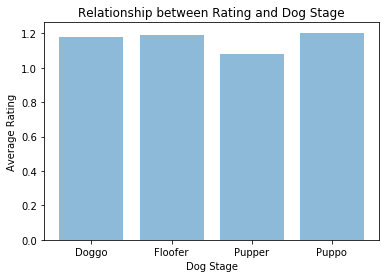

In [48]:
plt.bar(mean_rating.index, mean_rating, align='center', alpha=0.5)
plt.xticks(mean_rating.index)
plt.xlabel('Dog Stage')
plt.ylabel('Average Rating')
plt.title('Relationship between Rating and Dog Stage')

In [49]:
df[df['favorite_count'] == df['favorite_count'].min()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count
1101,707983188426153984,7.079801e+17,2.319108e+09,2016-03-10 17:35:20,Twitter for iPhone,@serial @MrRoles OH MY GOD I listened to all o...,NaN,12,10,NaN,NaN,51,2


#### How is the distribution of favortie tweet?

Text(0.5,1,'Favorite Count Distribution')

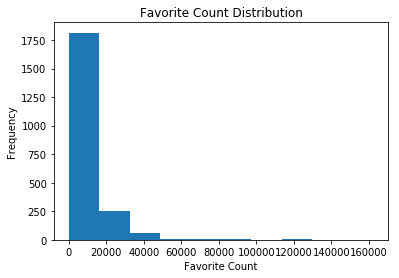

In [50]:
df.favorite_count.astype(int)
plt.hist(df.favorite_count)
plt.xlabel('Favorite Count')
plt.ylabel('Frequency')
plt.title('Favorite Count Distribution')

#### What is the relationship between favorite tweet and retweet?

Text(0,0.5,'retweet')

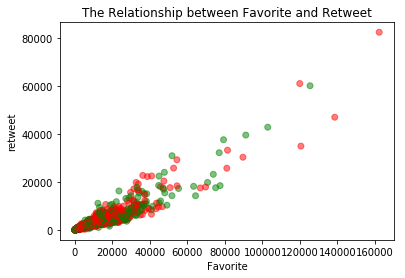

In [51]:
plt.scatter(df.favorite_count, df.retweet_count, alpha=0.5, color=['red','green'])
plt.title('The Relationship between Favorite and Retweet')
plt.xlabel('Favorite')
plt.ylabel('retweet')